<!--NAVIGATION-->
< [Streaming Prices](08.00 Streaming Prices.ipynb) | [Contents](Index.ipynb) | [Bonus Material II](10.00 Bonus Materials II.ipynb) >

# Bonus Material I

# FOREX LABS ENDPOINTS
*Note: According to the documentation materials in these section are under development. So it may change at any point in time or become invalid*

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import oandapy
import configparser

config = configparser.ConfigParser()
config.read('../config/config_v1.ini')
account_id = config['oanda']['account_id']
api_key = config['oanda']['api_key']

oanda = oandapy.API(environment="practice", 
                    access_token=api_key)

# Obtaining Historical Economic Calendar

In [2]:
calendar = oanda.get_eco_calendar(instrument="EUR_USD", period=86400)

In [3]:
print(calendar)

[{'unit': '% m/m', 'timestamp': 1485783000, 'market': '0.5', 'actual': '0.5', 'previous': '0.2', 'title': 'Personal spending', 'impact': 2, 'forecast': '0.4', 'region': 'americas', 'currency': 'USD'}, {'unit': '% m/m', 'timestamp': 1485788400, 'market': '1.1', 'previous': '-2.5', 'title': 'Pending Home Sales', 'impact': 2, 'currency': 'USD', 'region': 'americas', 'actual': '1.6'}]


In [4]:
df = pd.DataFrame(calendar)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.tail(10)

,actual,currency,forecast,impact,market,previous,region,timestamp,title,unit
0,0.5,USD,0.4,2,0.5,0.2,americas,2017-01-30 13:30:00,Personal spending,% m/m
1,1.6,USD,NaN,2,1.1,-2.5,americas,2017-01-30 15:00:00,Pending Home Sales,% m/m


***

# Historical Position Ratios

In [5]:
response = oanda.get_historical_position_ratios(instrument='USD_JPY', 
                                                period=60)
print(response['data']['USD_JPY']['data'])

[[1485741600, 46.58, 114.4], [1485742801, 46.61, 114.44], [1485744001, 46.41, 114.41], [1485745201, 46.42, 114.34], [1485746400, 46.32, 114.32], [1485747600, 46.42, 114.37], [1485748801, 47.04, 114.42], [1485750001, 47.28, 114.46], [1485751200, 47.33, 114.5], [1485752400, 47.34, 114.5], [1485753601, 46.75, 114.44], [1485754800, 46.94, 114.51], [1485756001, 47.27, 114.59], [1485757200, 47.43, 114.63], [1485758400, 47.41, 114.59], [1485759601, 47.3, 114.58], [1485760800, 47.57, 114.69], [1485762001, 47.82, 114.72], [1485763200, 47.73, 114.7], [1485764400, 48.04, 114.89], [1485765601, 48.08, 114.82], [1485766801, 47.83, 114.81], [1485768001, 48, 114.72], [1485769200, 47.76, 114.7], [1485770401, 47.91, 114.69], [1485771601, 47.47, 114.66], [1485772800, 47.58, 114.65], [1485774001, 47.06, 114.59], [1485775200, 47.11, 114.62], [1485776400, 48.42, 114.69], [1485777601, 48.08, 114.68], [1485778801, 48.63, 114.66], [1485780001, 49.3, 114.73], [1485781201, 48.19, 114.61], [1485782401, 47.64, 114

In [6]:
df = pd.DataFrame(response['data']['USD_JPY']['data'])
df.columns = ["Timestamp", "Long_pos_ratio", "exchange_rate"]
df["Timestamp"] = pd.to_datetime(df['Timestamp'], unit='s')
df

,Timestamp,Long_pos_ratio,exchange_rate
0,2017-01-30 02:00:00,46.58,114.40
1,2017-01-30 02:20:01,46.61,114.44
2,2017-01-30 02:40:01,46.41,114.41
3,2017-01-30 03:00:01,46.42,114.34
4,2017-01-30 03:20:00,46.32,114.32
5,2017-01-30 03:40:00,46.42,114.37
6,2017-01-30 04:00:01,47.04,114.42
7,2017-01-30 04:20:01,47.28,114.46
8,2017-01-30 04:40:00,47.33,114.50
9,2017-01-30 05:00:00,47.34,114.50


In [7]:
df = df.set_index("Timestamp")

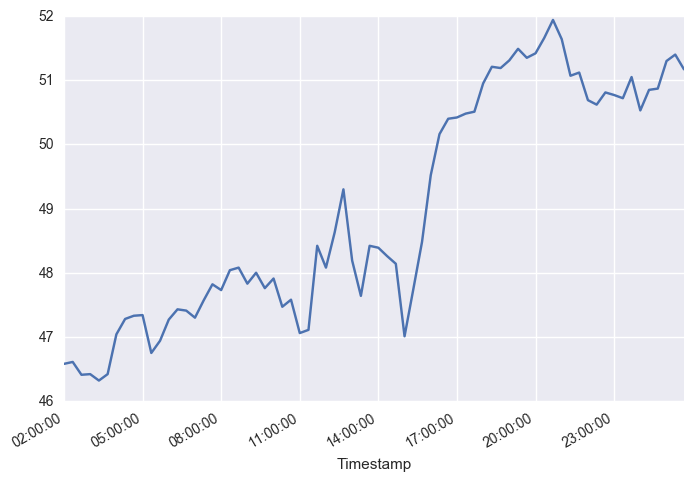

In [8]:
df['Long_pos_ratio'].plot();

***

# Get Historical Spread

In [9]:
response = oanda.get_historical_spreads(instrument='GBP_USD', period=600)
print(response)

{'avg': [[1485820800, 2.95722], [1485821700, 2.763]], 'max': [[1485820800, 4], [1485821700, 3.8]], 'min': [[1485820800, 2.3], [1485821700, 2.3]]}


***

# Commitments of Traders

In [10]:
response = oanda.get_commitments_of_traders(instrument='USD_CAD')
print(response['USD_CAD'][:10])

[{'unit': 'Contracts Of CAD 100,000', 'ncs': '15224', 'price': '1.000845', 'date': 1199768400, 'oi': '82454', 'ncl': '31648'}, {'unit': 'Contracts Of CAD 100,000', 'ncs': '15101', 'price': '1.010115', 'date': 1200373200, 'oi': '81827', 'ncl': '22866'}, {'unit': 'Contracts Of CAD 100,000', 'ncs': '16786', 'price': '1.02546', 'date': 1200978000, 'oi': '86378', 'ncl': '24463'}, {'unit': 'Contracts Of CAD 100,000', 'ncs': '21653', 'price': '1.019535', 'date': 1201582800, 'oi': '90907', 'ncl': '25948'}, {'unit': 'Contracts Of CAD 100,000', 'ncs': '20363', 'price': '1.000095', 'date': 1202187600, 'oi': '93574', 'ncl': '30603'}, {'unit': 'Contracts Of CAD 100,000', 'ncs': '22956', 'price': '0.999475', 'date': 1202792400, 'oi': '101187', 'ncl': '43391'}, {'unit': 'Contracts Of CAD 100,000', 'ncs': '21440', 'price': '1.005535', 'date': 1203397200, 'oi': '95614', 'ncl': '33387'}, {'unit': 'Contracts Of CAD 100,000', 'ncs': '24139', 'price': '1.002335', 'date': 1204002000, 'oi': '110073', 'ncl': 

***

# Orderbook

In [11]:
response = oanda.get_orderbook(instrument="EUR_USD", period=1)

In [12]:
pd.DataFrame(response)

,1485820801,1485822000,1485823200,1485824401,1485825601,1485826801
price_points,"{'1.087': {'pl': 0.2415, 'os': 0.2689, 'ps': 0...","{'1.087': {'pl': 0.2415, 'os': 0.2724, 'ps': 0...","{'1.087': {'pl': 0.2601, 'os': 0.2724, 'ps': 0...","{'1.087': {'pl': 0.2601, 'os': 0.2724, 'ps': 0...","{'1.087': {'pl': 0.2601, 'os': 0.2724, 'ps': 0...","{'1.087': {'pl': 0.2601, 'os': 0.2724, 'ps': 0..."
rate,1.0708,1.0702,1.0699,1.0697,1.0697,1.0696


In [13]:
pd.DataFrame(response['1485820801']['price_points'])

,1.03,1.0305,1.031,1.0315,1.032,1.0325,1.033,1.0335,1.034,1.0345,...,1.106,1.1065,1.107,1.1075,1.108,1.1085,1.109,1.1095,1.11,1.1105
ol,0.7606,0.8490,0.1592,0.7429,0.9375,0.8455,0.7358,1.2488,0.7606,0.1132,...,0.0460,0.0283,0.0495,0.0389,0.0495,0.0318,0.0495,0.0318,0.1840,0.0212
os,0.3538,0.2016,0.2158,0.1840,0.1981,0.2052,0.3219,0.4493,0.1769,0.1274,...,0.1663,0.1132,0.1592,0.1203,0.1521,0.1132,0.1309,0.1840,0.3219,0.0884
pl,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0186,0.0000,...,0.1115,0.0929,0.0929,0.0557,0.1115,0.0743,0.0557,0.0929,0.1486,0.0557
ps,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0372,0.0372,...,0.0000,0.0186,0.0000,0.0000,0.0372,0.0000,0.0000,0.0000,0.0186,0.0372


***

# Auto Chartist

In [14]:
response = oanda.get_autochartist()

In [15]:
pd.DataFrame(response['signals'][:5])

,data,id,instrument,meta,type
0,"{'patternendtime': 1485806400, 'points': {'res...",452007805,XPT_USD,"{'length': 78, 'historicalstats': {'symbol': {...",chartpattern
1,"{'patternendtime': 1485792000, 'points': {'res...",452005692,USB05Y_USD,"{'length': 50, 'historicalstats': {'symbol': {...",chartpattern
2,"{'patternendtime': 1485784800, 'points': {'res...",452004362,CAD_SGD,"{'length': 69, 'historicalstats': {'symbol': {...",chartpattern
3,"{'patternendtime': 1485784800, 'points': {'res...",452004356,XAU_SGD,"{'length': 28, 'historicalstats': {'symbol': {...",chartpattern
4,"{'patternendtime': 1485777600, 'points': {'res...",452003304,XAG_EUR,"{'length': 26, 'historicalstats': {'symbol': {...",chartpattern


<!--NAVIGATION-->
< [Streaming Prices](08.00 Streaming Prices.ipynb) | [Contents](Index.ipynb) | [Bonus Material II](10.00 Bonus Materials II.ipynb) >